## Preprocessing data to improve the result
    I use some of ways in preprocessing steps: 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [0]:
trainset = pd.read_csv("input/train.csv")
testset = pd.read_csv("input/test.csv")

In [0]:
X_train = trainset.iloc[: 5000,1:].values.astype("float32")
label = trainset.iloc[: 5000, :1].values.astype("int32")
X_test = testset.iloc[:5000,:].values.astype("float32")

NameError: name 'trainset' is not defined

In [0]:
X_test.shape

(5000, 784)

In [0]:
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.std(X_train)
X_train -= mean
X_test -= mean

In [0]:
scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test = scale.transform(X_test)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, label, test_size=0.2, random_state=0)

In [0]:
clf = SVC(kernel='rbf', C=7, gamma=0.01)
clf.fit(X_train, y_train)

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
pred = clf.predict(X_val)

In [0]:
pred.shape

(1000,)

In [0]:
y_val = y_val.reshape(-1,)

In [0]:
print("mean accuracy: ",(len(pred) - sum(pred != y_val))/len(pred))

mean accuracy:  0.945


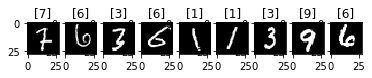

In [0]:

for i in range(9):
    plt.subplot(191 + i)
    img = X_train.reshape([4000,28,28])[i]
    plt.imshow(img, cmap='gray')
    plt.title(y_train[i])

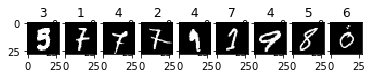

In [0]:
a = 0
for i,j in list(enumerate(pred != y_val)):
    if j == True:
        plt.subplot(191 + a)
        img = X_val.reshape([1000,28,28])[i]
        plt.imshow(img, cmap='gray')
        plt.title(pred[i])
        a = a + 1
        if a >= 9:
            break

In [0]:
X_train = trainset.iloc[: 5000,1:].values.astype("float32")
label = trainset.iloc[: 5000, :1].values.astype("int32")
X_test = testset.iloc[:5000,:].values.astype("float32")

In [0]:
X_train[X_train > 0] = 1
X_test[X_test > 0] = 1

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, label, test_size=0.2, random_state=0)

In [0]:
clf = SVC(kernel='rbf', C=7, gamma=0.01)
clf.fit(X_train, y_train)

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
pred = clf.predict(X_val)

In [0]:
y_val = y_val.reshape(-1,)
print("mean accuracy: ", (int(len(pred)) - int(sum(pred != y_val)))/int(len(pred)))

mean accuracy:  0.94


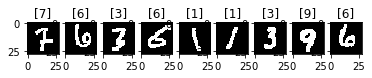

In [0]:
for i in range(9):
    plt.subplot(191 + i)
    img = X_train.reshape([4000,28,28])[i]
    plt.imshow(img, cmap='gray')
    plt.title(y_train[i])

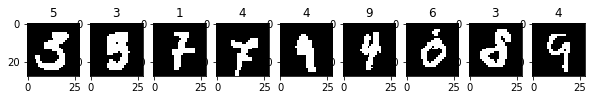

In [0]:
a = 0
for i,j in list(enumerate(pred != y_val)):
    if j == True:
        plt.subplot(191 + a)
        img = X_val.reshape([1000,28,28])[i]
        plt.imshow(img, cmap='gray')
        plt.title(pred[i])
        a = a + 1
        if a >= 9:
            break